<a href="https://colab.research.google.com/github/whoisdpr/-1IEE352-Study/blob/main/Laboratorio1_20202335.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

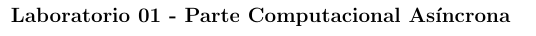

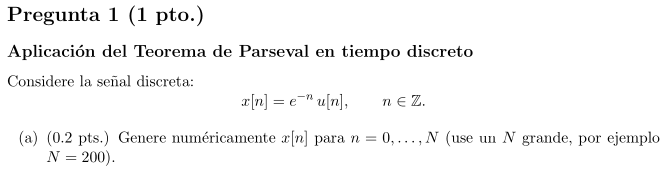

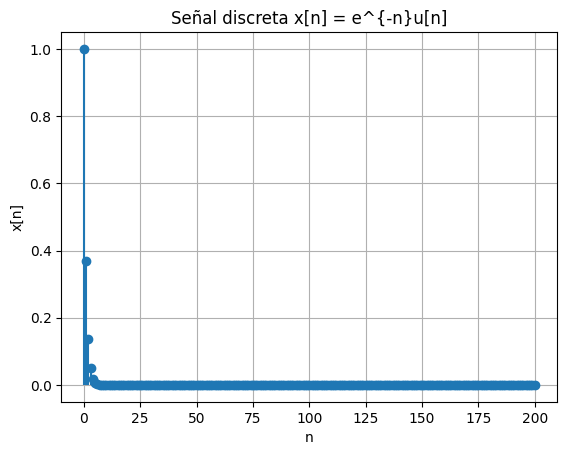

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
N = 200
n = np.arange(0, N+1)
x = np.exp(-n)  # x[n] = e^{-n} u[n]

# Gráfica
plt.stem(n, x, basefmt=" ")
plt.title("Señal discreta x[n] = e^{-n}u[n]")
plt.xlabel("n")
plt.ylabel("x[n]")
plt.grid(True)
plt.show()


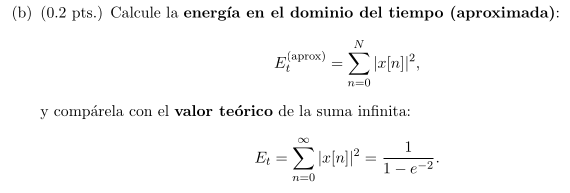

E_t_aprox = 1.1565176427496657
E_t_teorica = 1.1565176427496657


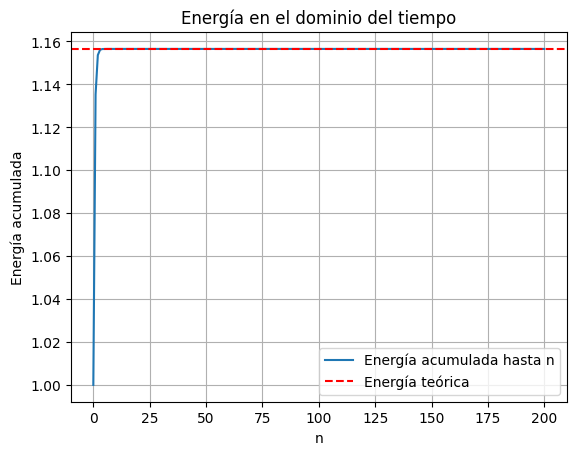

In [15]:
# Energía aproximada (suma hasta N)
E_t_aprox = np.sum(np.abs(x)**2)

# Energía teórica
E_t_teorica = 1 / (1 - np.exp(-2))

print("E_t_aprox =", E_t_aprox)
print("E_t_teorica =", E_t_teorica)

# Gráfica acumulada
E_acum = np.cumsum(np.abs(x)**2)
plt.plot(n, E_acum, label="Energía acumulada hasta n")
plt.axhline(E_t_teorica, color="r", linestyle="--", label="Energía teórica")
plt.title("Energía en el dominio del tiempo")
plt.xlabel("n")
plt.ylabel("Energía acumulada")
plt.legend()
plt.grid(True)
plt.show()



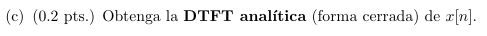

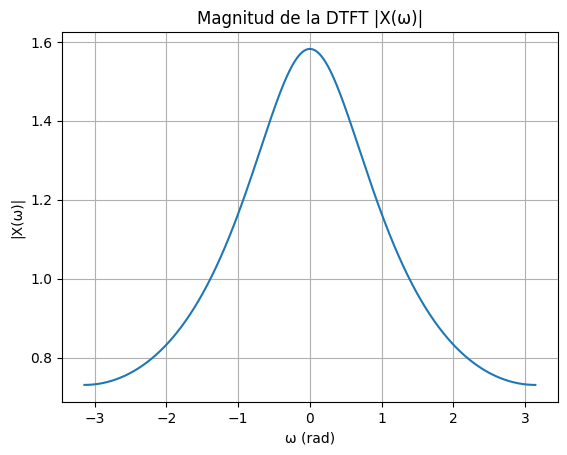

In [16]:
w_vals = np.linspace(-np.pi, np.pi, 2001)
X_vals = 1 / (1 - np.exp(-(1 + 1j*w_vals)))

plt.plot(w_vals, np.abs(X_vals))
plt.title("Magnitud de la DTFT |X(ω)|")
plt.xlabel("ω (rad)")
plt.ylabel("|X(ω)|")
plt.grid(True)
plt.show()



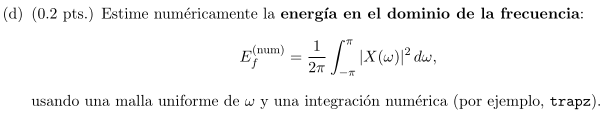

E_f_num = 1.1565176427496657


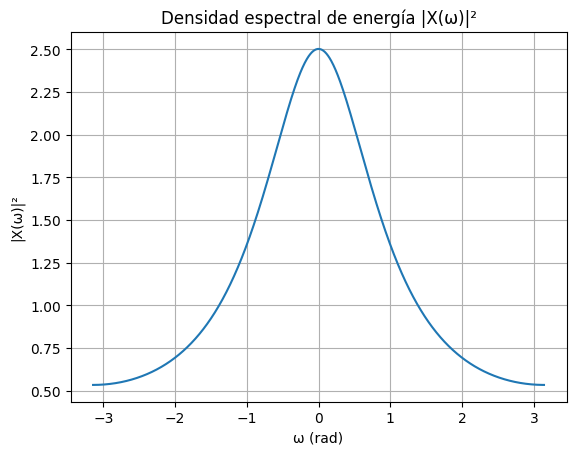

In [18]:
# Energía numérica en frecuencia
E_f_num = np.trapezoid(np.abs(X_vals)**2, w_vals) / (2*np.pi)
print("E_f_num =", E_f_num)

# Gráfica de densidad espectral de energía
plt.plot(w_vals, np.abs(X_vals)**2)
plt.title("Densidad espectral de energía |X(ω)|²")
plt.xlabel("ω (rad)")
plt.ylabel("|X(ω)|²")
plt.grid(True)
plt.show()


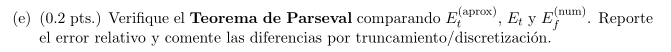

E_t_aprox = 1.1565176427496657
E_t_teorica = 1.1565176427496657
E_f_num    = 1.1565176427496657


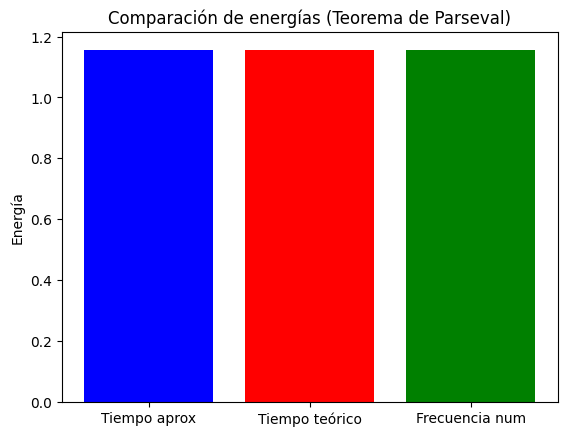

In [19]:
# Comparación
print("E_t_aprox =", E_t_aprox)
print("E_t_teorica =", E_t_teorica)
print("E_f_num    =", E_f_num)

# Gráfica comparativa
plt.bar(["Tiempo aprox", "Tiempo teórico", "Frecuencia num"],
        [E_t_aprox, E_t_teorica, E_f_num], color=["b", "r", "g"])
plt.title("Comparación de energías (Teorema de Parseval)")
plt.ylabel("Energía")
plt.show()



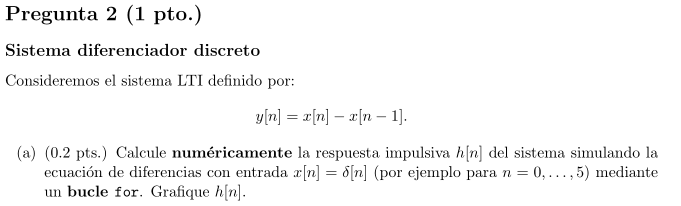

h[n] = [ 1. -1.  0.  0.  0.  0.]


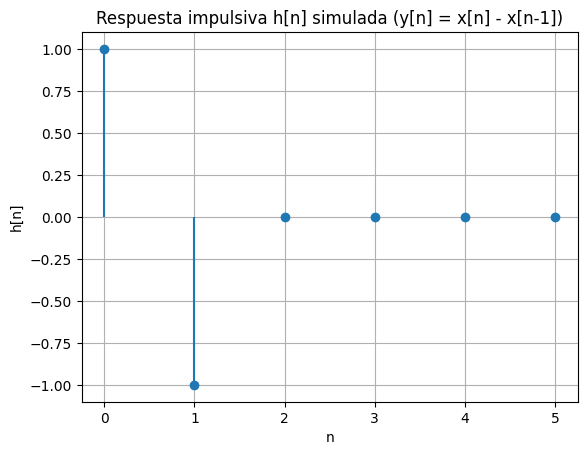

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Sistema: y[n] = x[n] - x[n-1]
# Entrada impulso: delta[n]
N = 5
n = np.arange(0, N+1)

x = np.zeros(N+1)
x[0] = 1.0  # delta[0] = 1

y = np.zeros(N+1)
x_prev = 0.0  # x[-1] = 0 por causalidad

for k in range(N+1):
    y[k] = x[k] - x_prev
    x_prev = x[k]

h = y.copy()  # respuesta impulsiva simulada

print("h[n] =", h)

plt.stem(n, h, basefmt=" ")
plt.title("Respuesta impulsiva h[n] simulada (y[n] = x[n] - x[n-1])")
plt.xlabel("n")
plt.ylabel("h[n]")
plt.grid(True)
plt.show()


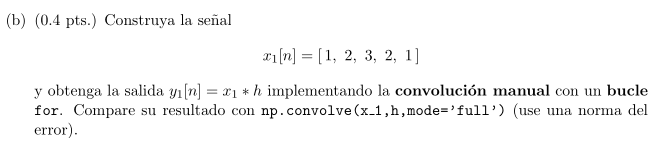

y_manual = [ 1.  1.  1. -1. -1. -1.]
y_numpy  = [ 1.  1.  1. -1. -1. -1.]
||error||_2 = 0.0


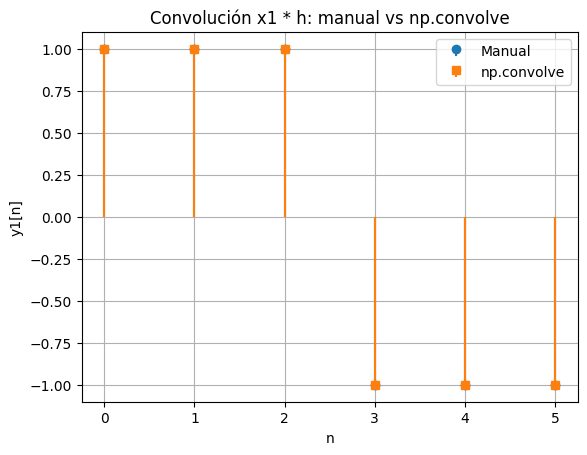

In [21]:
# Señal de entrada
x1 = np.array([1, 2, 3, 2, 1], dtype=float)

# Usamos h[n] del inciso (a); basta con sus dos primeros taps no nulos
h_short = h[:2]  # [1, -1]

# Convolución manual (full): y[k] = sum_m x1[m] * h[k-m]
Ly = len(x1) + len(h_short) - 1
y_manual = np.zeros(Ly)

for k in range(Ly):
    acc = 0.0
    # m recorre índices válidos de x1
    m_min = max(0, k - (len(h_short) - 1))
    m_max = min(k, len(x1) - 1)
    for m in range(m_min, m_max + 1):
        acc += x1[m] * h_short[k - m]
    y_manual[k] = acc

# Comparación con NumPy
y_np = np.convolve(x1, h_short, mode='full')

# Norma del error
err = np.linalg.norm(y_manual - y_np)
print("y_manual =", y_manual)
print("y_numpy  =", y_np)
print("||error||_2 =", err)

# Gráfica comparación
k = np.arange(Ly)
plt.stem(k, y_manual, basefmt=" ", linefmt="C0-", markerfmt="C0o", label="Manual")
plt.stem(k, y_np, basefmt=" ", linefmt="C1-", markerfmt="C1s", label="np.convolve")
plt.title("Convolución x1 * h: manual vs np.convolve")
plt.xlabel("n")
plt.ylabel("y1[n]")
plt.legend()
plt.grid(True)
plt.show()


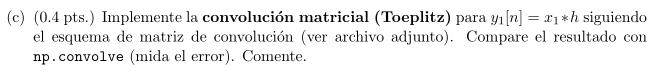

Matriz C (primeras filas):
 [[ 1.  0.  0.  0.  0.]
 [-1.  1.  0.  0.  0.]
 [ 0. -1.  1.  0.  0.]
 [ 0.  0. -1.  1.  0.]
 [ 0.  0.  0. -1.  1.]
 [ 0.  0.  0.  0. -1.]]
y_toeplitz = [ 1.  1.  1. -1. -1. -1.]
y_ref      = [ 1.  1.  1. -1. -1. -1.]
||error||_2 (Toeplitz vs np.convolve) = 0.0


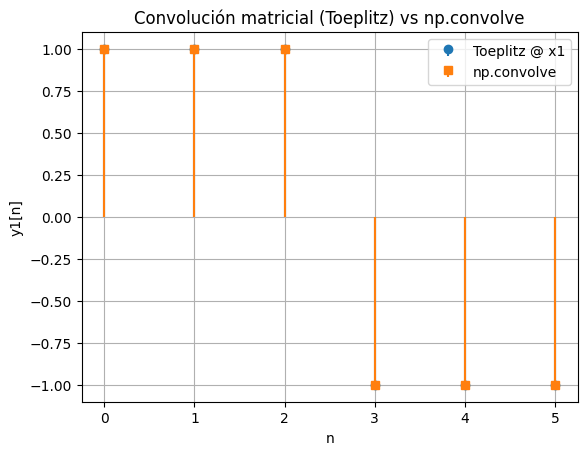

In [22]:
from numpy.linalg import norm

x = x1
h_toeplitz = h_short  # [1, -1]

Lx = len(x)
Lh = len(h_toeplitz)
Ly = Lx + Lh - 1

# Matriz de convolución (Toeplitz "estirada")
C = np.zeros((Ly, Lx))
for col in range(Lx):
    # Columna 'col' es h desplazada 'col' posiciones hacia abajo
    for r in range(Ly):
        k = r - col
        if 0 <= k < Lh:
            C[r, col] = h_toeplitz[k]

# Producto matricial
y_toep = C @ x

# Comparación con np.convolve
y_ref = np.convolve(x, h_toeplitz, mode='full')
err_toep = norm(y_toep - y_ref)

print("Matriz C (primeras filas):\n", C[:min(6, Ly), :])
print("y_toeplitz =", y_toep)
print("y_ref      =", y_ref)
print("||error||_2 (Toeplitz vs np.convolve) =", err_toep)

# Gráfica comparación
k = np.arange(Ly)
plt.stem(k, y_toep, basefmt=" ", linefmt="C0-", markerfmt="C0o", label="Toeplitz @ x1")
plt.stem(k, y_ref, basefmt=" ", linefmt="C1-", markerfmt="C1s", label="np.convolve")
plt.title("Convolución matricial (Toeplitz) vs np.convolve")
plt.xlabel("n")
plt.ylabel("y1[n]")
plt.legend()
plt.grid(True)
plt.show()
